# Importação e normalização dos dados resumido

In [1]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#importando dados
dados_api = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
resultado_dados_api = dados_api.json()
df = pd.json_normalize(resultado_dados_api)
#separando colunas importantes
series_importantes = ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner','customer.Dependents', 'customer.tenure', 
                      'phone.PhoneService', 'internet.InternetService', 'account.Contract', 'account.PaymentMethod', 
                      'account.Charges.Monthly', 'account.Charges.Total']
df = df[series_importantes]
#tratando dados 
remover = df.query('Churn == ""').index
df.drop(remover, axis=0, inplace=True)
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(str)
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].map({'0': 'No', '1': 'Yes'})
#normalizando os tipos de dados
col_string = ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner','customer.Dependents', 'phone.PhoneService', 'internet.InternetService',
              'account.Contract', 'account.PaymentMethod']
df = df.astype({col: 'string' for col in col_string})
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', '0')
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)
#criando contas_diarias mantendo a padronização no nome
df['account.Charges.Daily'] = (df['account.Charges.Monthly']/30).round(2)
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.30,2.19
1,No,Male,No,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.40,2.00
2,Yes,Male,No,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.80


# **Distribuição da evasão**

In [2]:
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig = px.bar(churn_counts, 
             y='Churn', 
             x='Count', 
             title='Número de pessoas que optaram ou não pela evasão', 
             color='Churn', color_discrete_sequence=px.colors.qualitative.Pastel,  
             labels={'Churn': 'Evasão', 'Count': 'Número de clientes'})
fig.update_layout(
            width = 900,
            height= 500)
fig.show()

<img src='img_estaticas_graficos/churn_geral.png'> 

# **Evasão por gênero**

In [3]:
df_gender = df[['customer.gender', 'Churn']].value_counts().reset_index()
df_gender_yes = df_gender.query('Churn == "Yes"')

fig = px.pie(df_gender_yes, values='count', names='customer.gender', title='Número de evasão entre homens e mulheres', color='customer.gender', color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(
    width = 900,
    height= 500,
    title={
        'text': 'Número de evasão entre homens e mulheres',
        'y':0.95,                     
        'x':0.5,                        
        'xanchor': 'center',            
        'yanchor': 'top'  
    })
fig.update_traces(textposition='inside', textinfo='percent+label', rotation=45, hovertemplate="<b>%{label}</b><br>Total: %{value}<br>Porcentagem: %{percent}")
fig.show()


<img src='img_estaticas_graficos/churn_genero.png'>

# **Evasão por idade**

In [4]:
df_senior = df[['Churn', 'customer.SeniorCitizen']].value_counts().reset_index()
df_senior_yes = df_senior.query('Churn == "Yes"')
fig = px.pie(df_senior_yes, values='count', names='customer.SeniorCitizen', title='Número de evasão entre clientes +60 (No/Yes)', color='customer.SeniorCitizen', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(
    width = 900,
    height= 500,
    title={
        'text': 'Número de evasão entre clientes +60 (No/Yes)',
        'y':0.95,                     
        'x':0.5,                        
        'xanchor': 'center',            
        'yanchor': 'top'  
    })

fig.update_traces(textposition='inside', textinfo='percent+label', rotation=45, hovertemplate="<b>%{label}</b><br>Total: %{value}<br>Porcentagem: %{percent}")
fig.show()


<img src='img_estaticas_graficos/churn_idade.png'>

Mais de 50% das pessoas fazendo evasão não são +60

# **Evasão por tipo de pagameto**

In [5]:
df_pagamentos = df[['Churn', 'account.PaymentMethod']].value_counts().reset_index()
df_pagamentos = df_pagamentos.query('Churn == "Yes"')

fig = px.bar(df_pagamentos,
             y='account.PaymentMethod', 
             x='count', title='Evasão por tipo de pagamento',
             color='account.PaymentMethod', 
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             labels={'account.PaymentMethod': 'Tipo de pagamento', 'count': 'Número de clientes'})
fig.update_layout(
            width = 900,
            height= 500)
fig.show()

<img src='img_estaticas_graficos/churn_pagamento.png'>

O tipo de pagamento com maio evasão é o de pagamento eletrônico

# **Evasão por tipo de contrato**

In [6]:
df_tipo_contrato = df[['Churn', 'account.Contract']].value_counts().reset_index()
df_tipo_contrato = df_tipo_contrato.query('Churn == "Yes"')

fig = px.bar(df_tipo_contrato, 
             x='count', 
             y='account.Contract', 
             title='Evasão por tipo de contrato', 
             color='account.Contract', 
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             labels={'account.Contract': 'Tipo de contrato', 'count': 'Número de clientes'})
fig.update_layout(
            width = 900,
            height= 500)
fig.show()

<img src='img_estaticas_graficos/churn_contrato.png'>

O tipo de contrato com maior evasão é o mensal

# **Evasão por tempo de contrato**

In [7]:
sns.set_style('white')
color_palette = 'muted'

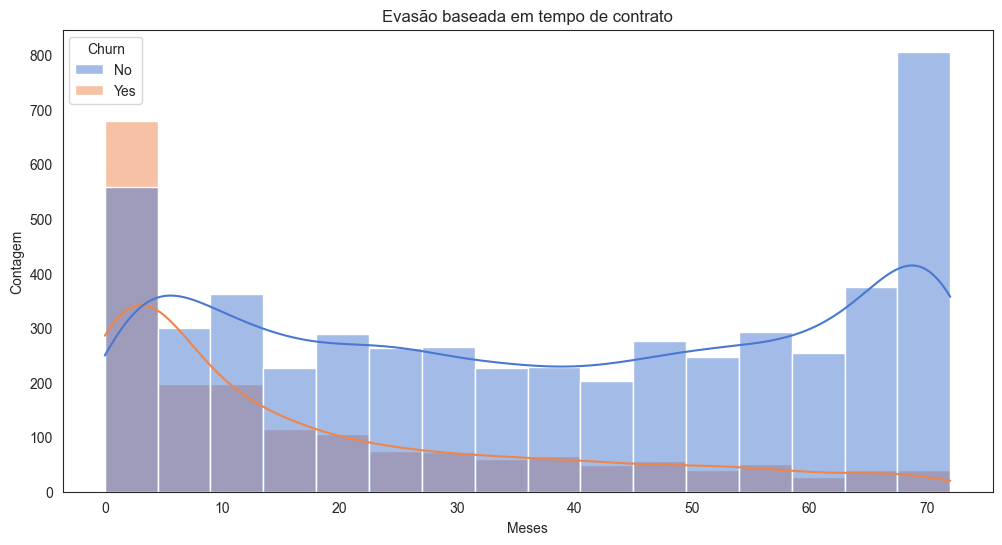

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='customer.tenure', hue='Churn', kde=True, palette=color_palette)
plt.title('Evasão baseada em tempo de contrato')
plt.xlabel('Meses')
plt.ylabel('Contagem')
plt.show()

clientes com mais tempo de contrato tendem a ficar

# **Evasão por serviço de telefone**

In [9]:
df_telefone = df[['Churn', 'phone.PhoneService']].value_counts().reset_index()
df_telefone = df_telefone.query('Churn == "Yes"')

fig = px.bar(df_telefone, 
             x='count', 
             y='phone.PhoneService', 
             title='Evasão por adesão de serviço de telefone', 
             color='phone.PhoneService', 
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             labels={'phone.PhoneService': 'serviço de telefone(sim/não)', 
                     'count': 'Número de clientes'})
fig.update_layout(
            width = 900,
            height= 500)
fig.show()

<img src='img_estaticas_graficos/churn_telefone.png'>

clientes com serviço de telefone são a maioria na contagem de evasão, sinalizando uma problematica nesse quesito

# **Evasão por serviço de internet**

In [10]:
df_internet = df[['Churn', 'internet.InternetService']].value_counts().reset_index()
df_internet = df_internet.query('Churn == "Yes"')

fig = px.bar(df_internet, 
             x='count', 
             y='internet.InternetService', 
             title='Evasão por adesão de serviço de internet', 
             color='internet.InternetService', 
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             labels={'interent.InternetService': 'serviço de internet', 'count': 'Número de clientes'})
fig.update_layout(
            width = 900,
            height= 500)
fig.show()

<img src='img_estaticas_graficos/churn_internet.png'>

clientes com fibra óptica são a maioria na contagem de evasão

# **Evasão por gastos**

## Diário

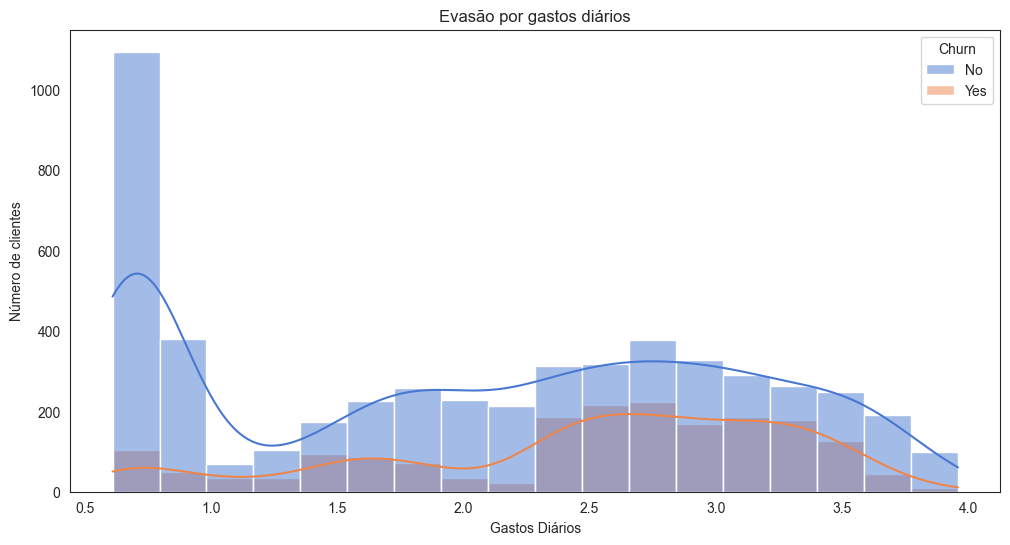

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='account.Charges.Daily', hue='Churn', kde=True, palette=color_palette)
plt.title('Evasão por gastos diários')
plt.xlabel('Gastos Diários')
plt.ylabel('Número de clientes')
plt.show()

## Mensal

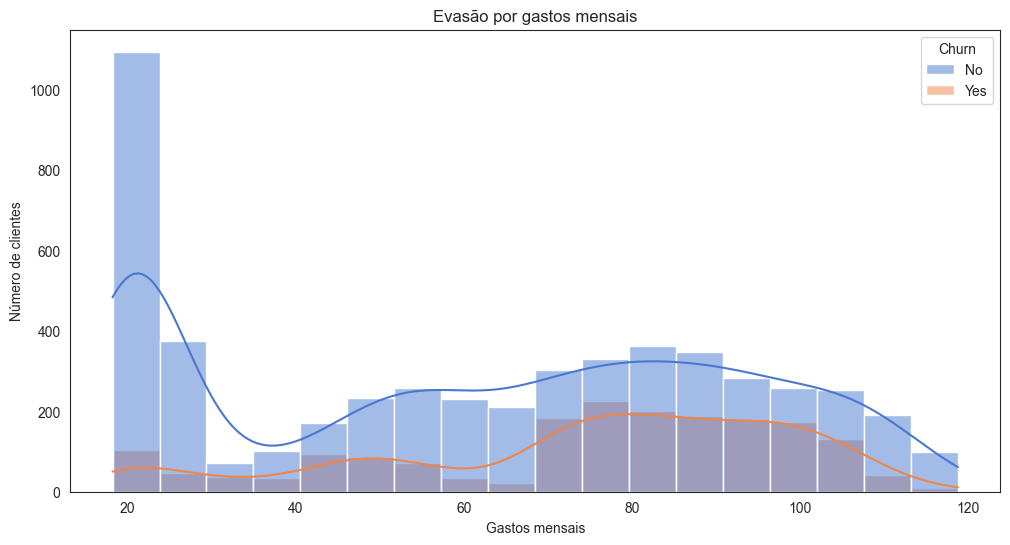

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='account.Charges.Monthly', hue='Churn', kde=True, palette=color_palette)
plt.title('Evasão por gastos mensais')
plt.xlabel('Gastos mensais')
plt.ylabel('Número de clientes')
plt.show()

## Total

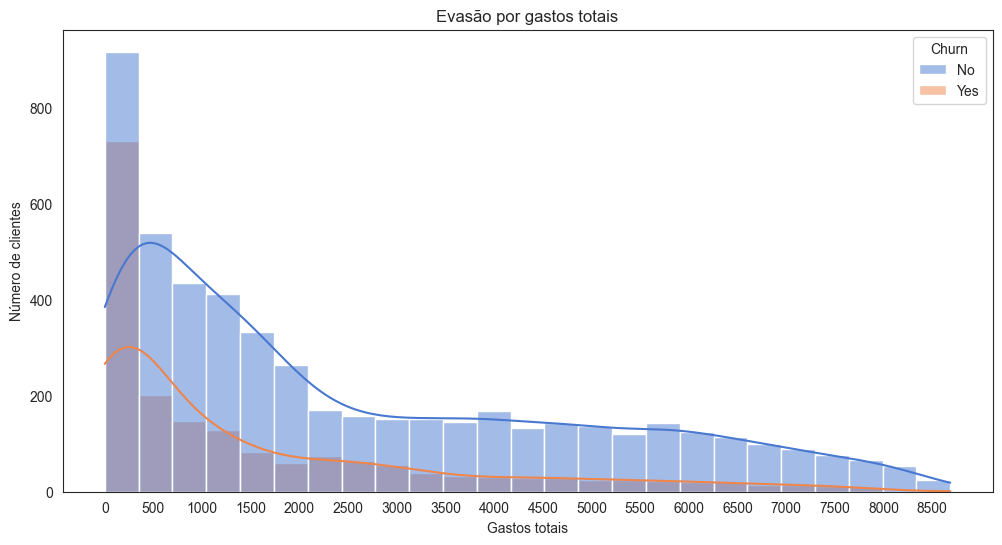

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, 
             x='account.Charges.Total', 
             hue='Churn', 
             kde=True, 
             palette=color_palette)
plt.title('Evasão por gastos totais')
plt.xlabel('Gastos totais')
plt.ylabel('Número de clientes')
plt.xticks(range(0,9000,500))
plt.show()